In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime
import os
import importlib
from IPython.display import Audio

os.chdir("..")
import context
context.get()

import baseMethods
importlib.reload(baseMethods)

import magSonify
from magSonify import SimulateData

if not os.path.exists('Audio_Tests_Artifacts'):
        os.mkdir('Audio_Tests_Artifacts')

## Frequency sweeps with Harmonics

The spectogram plots represent the difference between the actual and expected spectogram.

Note how for the WSOLA, the introduction of noise leads to a large degree of metallic distoritons, thus making it unsuitable for real world data.

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


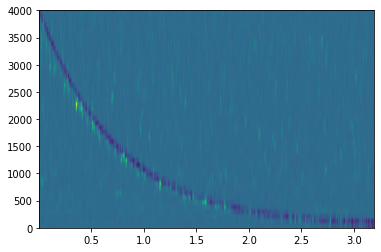

In [2]:
NOISE_MAGNITUDE = 2

def myProcessing(algorithm='waveletStretch',actualCutdown='False'):
    before, expect = baseMethods.getBeforeAndExpectation_Sweep(4000,50,0.2)
    actual = before.copy()
    expect = SimulateData().applyGaussianWhiteNoise(expect,NOISE_MAGNITUDE)
    actual = SimulateData().applyGaussianWhiteNoise(actual,NOISE_MAGNITUDE)
    getattr(actual,algorithm)(16)
    expect.normalise()
    if actualCutdown:
        actual = actual[2000:]
    actual.normalise()

    NFFT = 256*2
    noverlap = NFFT//2
    
    fig, axs = plt.subplots(2,1)
    s1, f1, t1, _ = axs[0].specgram(expect.x,Fs=44100,NFFT=NFFT,noverlap=noverlap)
    s2, f2, t2, _ = axs[1].specgram(actual.x,Fs=44100,NFFT=NFFT,noverlap=noverlap)
    s = s2-s1[:,:s2.shape[1]]
    plt.close()
    plt.imshow(s,extent=(t1[0],t1[-1],f1[0],f1[-1]),origin='lower',aspect='auto')
    plt.ylim(0,4000)
    plt.show()
    return expect, actual
expect, actual = myProcessing('waveletStretch')

In [3]:
Audio(expect.x,rate=44100)
#expect.genMonoAudio('Audio_Tests_Artifacts/expectedFreqSweepNoise.wav')

In [4]:
actual = actual[2000:]
Audio(actual.x,rate=44100)
#actual.genMonoAudio('Audio_Tests_Artifacts/waveletsFreqSweepNoise.wav')

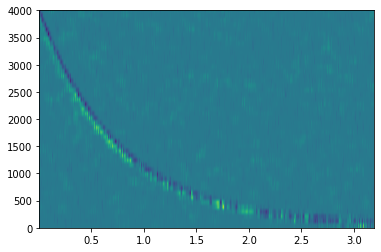

In [5]:
expect, actual = myProcessing('phaseVocoderStretch',actualCutdown='False')

In [6]:
Audio(expect.x,rate=44100)

In [7]:
Audio(actual.x,rate=44100)
#actual.genMonoAudio('Audio_Tests_Artifacts/phaseVocoderFreqSweepNoise.wav')

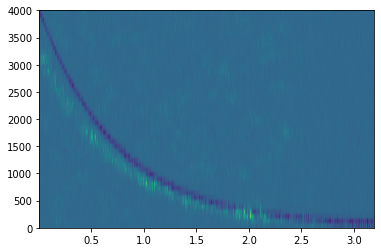

In [8]:
expect, actual = myProcessing('paulStretch')

In [9]:
Audio(expect.x,rate=44100)

In [10]:
Audio(actual.x,rate=44100)
#actual.genMonoAudio('Audio_Tests_Artifacts/paulstretchFreqSweepNoise.wav')

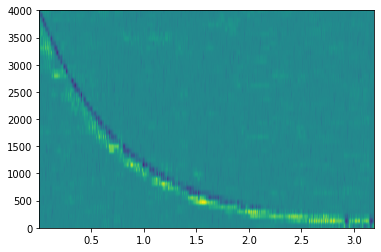

In [11]:
expect, actual = myProcessing('wsolaStretch')

In [12]:
Audio(expect.x,rate=44100)

In [13]:
Audio(actual.x,rate=44100)